In [35]:
# matrix and vector computations in Python
#can be performed using the array class from the NumPy library
#defines two vectors, ket0 and ket1 , corresponding to the qubit state vectors , and displays their average.

from numpy import array
from IPython.display import display

ket0 = array([1, 0])
ket1 = array([0, 1])

display(ket0 / 2 + ket1 / 2)
#make sure to give space before and after / and import display from ipyhton library


array([0.5, 0.5])

In [36]:
#It is not actually necessary to explicitly use the display command to see the result of this computation. We may instead simply write the expression of interest as the last line of the code cell, and it will be returned as its output:

ket0 = array([0,1])
ket1 = array([1,0])

ket0 / 2 + ket1 / 2
#make sure to write array before the vector, otherwise it will be treated as a list
#also you need to import arrays or any other package only once in a file

array([0.5, 0.5])

In [37]:
#We can also use array to create matrices that represent operations.
#M1 is a 2x2 matrix with the elements 1, 1 in the first row and 0, 0 in the second row.
M1 = array([[1,1],[0,0]])
M2 = array([[1,1],[1,0]])
M1 / 2 + M2 /2

array([[1. , 1. ],
       [0.5, 0. ]])

In [38]:
#Matrix multiplication (including matrix-vector multiplication as a special case) can be performed using the matmul function from NumPy
from numpy import matmul
display(matmul(ket1, M1))
display(matmul(M1, M2))
display(matmul(M2, M1))

array([1, 1])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

In [39]:

#Qiskit's Statevector class provides functionality for defining and manipulating quantum state vectors. 
#The following code cell imports the Statevector class and defines a few vectors using it. 
#Note that we need the sqrt function from the NumPy library to compute the square roots for the vector u .)
from qiskit.quantum_info import Statevector
from numpy import sqrt
u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([1+2j / 3, -2 / 3])
w = Statevector([1 / 3 , 2 / 3])
print("This code block defines the statevectors u, v, and w.")


This code block defines the statevectors u, v, and w.


In [40]:
#The Statevector class provides a draw method for displaying state vectors, including latex and text options for different visualizations, as this code cell demonstrates:
display(u.draw("latex"))
display(v.draw("text"))

<IPython.core.display.Latex object>

[ 1.        +0.66666667j,-0.66666667+0.j        ]

In [41]:
#The Statevector class also includes the is_valid method, which checks to see if a given vector is a valid quantum state vector (i.e., that it has Euclidean norm equal to 1):
display(u.is_valid())
display(v.is_valid())
display(w.is_valid())

True

False

False

In [46]:
#measurements of quantum states can be simulated in Qiskit, using the measure method from the Statevector class
u.measure()

('1',
 Statevector([0.+0.j, 1.+0.j],
             dims=(2,)))

In [47]:
display(u.draw("latex"))

<IPython.core.display.Latex object>

{'0': 52, '1': 48}

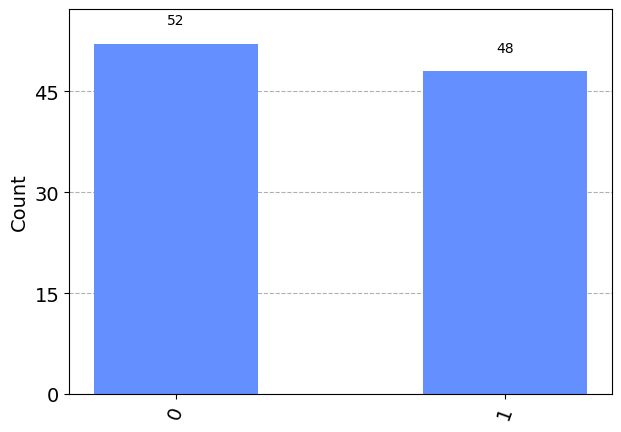

In [51]:
#Statevector also comes with a sample_counts method that allows for the simulation of any number of measurements on the system.
#The cell also demonstrates the plot_histogram function for visualizing the results.
from qiskit.visualization import plot_histogram

statistics = u.sample_counts(100)
display(statistics)
plot_histogram(statistics)

In [55]:
#Unitary operations can be defined and performed on state vectors in Qiskit using the Operator class, as in the example that follows.
from qiskit.quantum_info import Operator
X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])

v = Statevector([1, 0])
#statevectors are mutable so we can redefine v
v = v.evolve(H)
v = v.evolve(S)
v = v.evolve(T)
v = v.evolve(X)
(v.draw("latex"))


<IPython.core.display.Latex object>

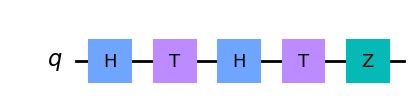

In [56]:
#experiment with composing qubit unitary operations using Qiskit's QuantumCircuit class
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()